In [2]:
import numpy as np
from scipy.sparse.linalg import expm
from scipy.constants import hbar, pi
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

from sim_functions import time_evolve, gen_ham_free, gen_ham_plus, gen_ham_minus

# Note: double check these at some point
m = 85*1.66e-27 # Rb-85 mass
kb = 1.38064852e-23 # Boltzmann's constant
omega_2 = 2*pi*(384.230406373e12 - 1.264888e9) # Beam 2 freq.
omega_1 = 2*pi*(384.230406373e12 + 1.770843e9) # Beam 1 freq.
omega_eg = omega_1 - omega_2 # Hyperfine splitting.
k_eff = (omega_1+omega_2)/(3e8) # Effective wavevector.
dR = (hbar*k_eff**2)/(2*m) # two-photon recoil shift
print(dR)


96801.12450302762


### Generate pulse hams

In [ ]:
n_min = 0
n_max = 4
n_tot = n_max - n_min + 1
basis = np.arange(n_min, n_max + 1)

# Detuning and laser phase has to be updated here for all the following cells
Rabi_plus = 2*pi*100000
Rabi_minus = 2*pi*100000
Rabi_plus_time = 2*pi/Rabi_plus
Rabi_minus_time = 2*pi/Rabi_minus

H0 = gen_ham_free(basis = basis,
                  delta_L = 5*dR,
                  delta_D = 0,
                  delta_R = dR,
)

Hplus = gen_ham_plus(basis = basis,
                  phi_L = 0,
                  omega_R_plus = Rabi_plus,
)

Hminus = gen_ham_minus(basis = basis,
                  phi_L = 0,
                  omega_R_minus = Rabi_minus,
)


### Rabi flops

0.9999975276588056

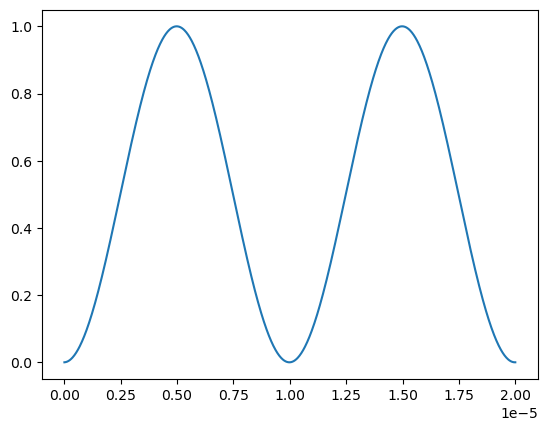

In [43]:
time = np.linspace(0, Rabi_plus_time*2, 1000)
time_step = time[1]-time[0]
data1 = []
data2 = []

state_vec = np.zeros((np.size(basis), 1), dtype=np.complex128)
state_vec[2] = 1
for t in time:

    state_vec = time_evolve(time_step, Hplus + H0) @ state_vec
    square = np.abs(state_vec)**2
    data1.append(square[3][0])
    #data2.append(square[3][0])

plt.plot(time, data1)
#plt.plot(time,data2)
np.max(data1)


### MZI

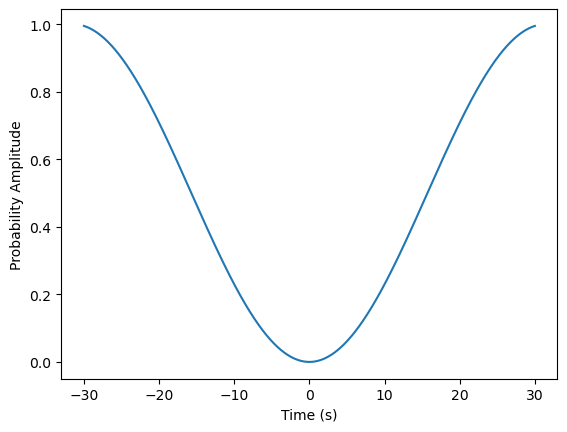

In [17]:
T = 100
free_time_range = np.linspace(-30, 30, 1000)
# time_step = time[1]-time[0]
# print(time_step)
# print(Rabi_plus_time)
data = []

for free_time in free_time_range:
    state_vec = np.zeros((np.size(basis), 1), dtype=np.complex128)
    state_vec[0] = 1

    state_vec = time_evolve(Rabi_plus_time/4, Hplus + H0) @ state_vec

    state_vec = time_evolve(T, H0) @ state_vec

    state_vec = time_evolve(Rabi_plus_time/2, Hplus + H0) @ state_vec
    
    state_vec = time_evolve(T + free_time, H0) @ state_vec
    
    state_vec = time_evolve(Rabi_plus_time/4, Hplus + H0) @ state_vec
    
    square = np.abs(state_vec)**2
    data.append(square[1])
  
# print(np.transpose(data))
plt.plot(free_time_range, data)
# plt.legend(basis,loc='upper left')
plt.xlabel('Time (s)')
plt.ylabel('Probability Amplitude')
plt.show()


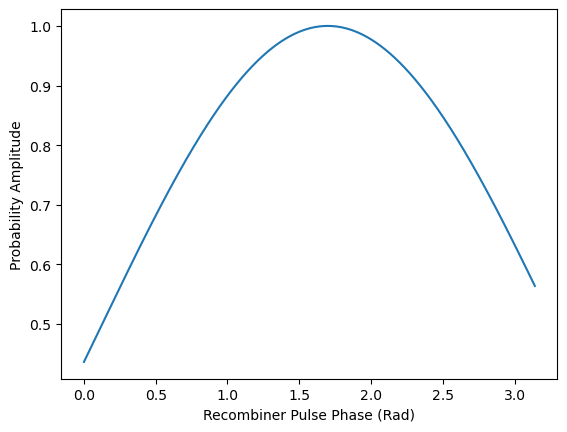

In [ ]:
n_min = 0
n_max = 2
n_tot = n_max - n_min + 1
basis = np.arange(n_min, n_max + 1)

Rabi_plus = 2*pi*100000
Rabi_minus = 2*pi*100000
Rabi_plus_time = 2*pi/Rabi_plus
Rabi_minus_time = 2*pi/Rabi_minus

H0 = gen_ham_free(basis = basis,
                  delta_L = dR,
                  delta_D = 0,
                  delta_R = dR,
)

Hplus = gen_ham_plus(basis = basis,
                  phi_L = 0,
                  omega_R_plus = Rabi_plus,
)

Hminus = gen_ham_minus(basis = basis,
                  phi_L = 0,
                  omega_R_minus = Rabi_minus,
)

T = 100*Rabi_plus_time
phase_range = np.linspace(0, pi, 1000)
# time_step = time[1]-time[0]
# print(time_step)
# print(Rabi_plus_time)
data = []

for phase in phase_range:
    state_vec = np.zeros((np.size(basis), 1), dtype=np.complex128)
    state_vec[0] = 1

    state_vec = time_evolve(Rabi_plus_time/4, Hplus + H0) @ state_vec

    state_vec = time_evolve(T, H0) @ state_vec

    state_vec = time_evolve(Rabi_plus_time/2, Hplus + H0) @ state_vec
    
    state_vec = time_evolve(T, H0) @ state_vec
    
    Hplusphase = gen_ham_plus(basis=basis, phi_L = phase, omega_R_plus = Rabi_plus)

    state_vec = time_evolve(Rabi_plus_time/4, Hplusphase + H0) @ state_vec
    
    square = np.abs(state_vec)**2
    data.append(square[1])
  
plt.plot(phase_range, data)
# plt.legend(basis,loc='upper left')
plt.xlabel('Recombiner Pulse Phase (Rad)')
plt.ylabel('Probability Amplitude')
plt.show()


### Alternating pulse sequence

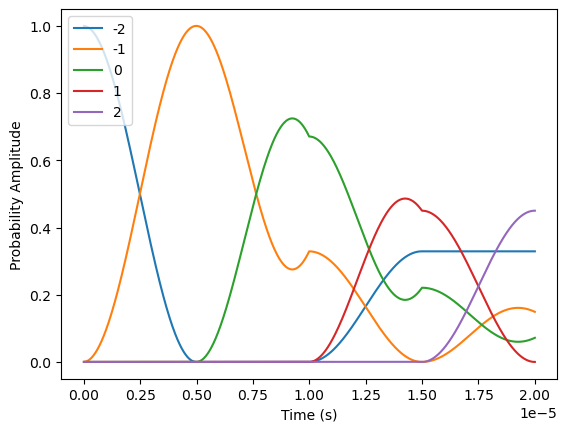

In [38]:
n_min = -2
n_max = 2
n_tot = n_max - n_min + 1
basis = np.arange(n_min, n_max + 1)

Rabi_plus = 2*pi*100000
Rabi_minus = 2*pi*100000
Rabi_plus_time = 2*pi/Rabi_plus
Rabi_minus_time = 2*pi/Rabi_minus

H0 = gen_ham_free(basis = basis,
                  delta_L = -3*dR,
                  delta_D = 0,
                  delta_R = dR,
)

Hplus = gen_ham_plus(basis = basis,
                  phi_L = 0,
                  omega_R_plus = Rabi_plus,
)

Hminus = gen_ham_minus(basis = basis,
                  phi_L = 0,
                  omega_R_minus = Rabi_minus,
)

time = np.linspace(0, 2*Rabi_plus_time, 1000)
time_step = time[1]-time[0]
data = np.zeros((np.size(basis), np.size(time)))

state_vec = np.zeros((np.size(basis), 1), dtype=np.complex128)
state_vec[0] = 1
for i in range(int(np.size(time)/4)):
    state_vec = time_evolve(time_step, Hplus + H0) @ state_vec
    square = np.abs(state_vec)**2
    data[:,i] = square[:,0]
    
for i in range(int(np.size(time)/4), int(np.size(time)/2)):
    state_vec = time_evolve(time_step, Hminus + H0) @ state_vec
    square = np.abs(state_vec)**2
    data[:,i] = square[:,0]
    
for i in range(int(np.size(time)/2), int(np.size(time)*3/4)):
    state_vec = time_evolve(time_step, Hplus + H0) @ state_vec
    square = np.abs(state_vec)**2
    data[:,i] = square[:,0]
    
for i in range(int(np.size(time)*3/4), int(np.size(time))):
    state_vec = time_evolve(time_step, Hminus + H0) @ state_vec
    square = np.abs(state_vec)**2
    data[:,i] = square[:,0]
  
# print(np.transpose(data))
plt.plot(time,np.transpose(data))
plt.legend(basis,loc='upper left')
plt.xlabel('Time (s)')
plt.ylabel('Probability Amplitude')
plt.show()